In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder 

In [26]:
datasets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/lab2/Exercise-CarData.csv')
print('\nData : \n',datasets)
print('\nDescribe : \n',datasets.describe())

X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, -1].values


Data : 
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]

Describe : 
         Unnamed: 0         Price  ...           CC      Weight
count  1436

In [27]:
X_new = datasets.iloc[:,1:3].values
print('\nX_new : \n',X_new)


X_new : 
 [[13500.    23.]
 [13750.    23.]
 [13950.    24.]
 ...
 [ 8500.    nan]
 [ 7250.    70.]
 [ 6950.    76.]]


In [28]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_new)
print("\nScaled X : \n",X_scaler)


Scaled X : 
 [[0.3250444  0.27848101]
 [0.3339254  0.27848101]
 [0.3410302  0.29113924]
 ...
 [0.14742451        nan]
 [0.10301954 0.87341772]
 [0.09236234 0.94936709]]


In [29]:
std = StandardScaler()
X_std = std.fit_transform(X_new)
print('\nStandatd X : \n',X_std)


Standatd X : 
 [[ 0.76376268 -1.75818903]
 [ 0.83271485 -1.75818903]
 [ 0.88787659 -1.70437596]
 ...
 [-0.6152808          nan]
 [-0.96004167  0.7710253 ]
 [-1.04278428  1.09390373]]


In [30]:
le = LabelEncoder()
X[: ,0] = le.fit_transform(X[: ,0])
print('\nInput : \n',X)


Input : 
 [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


In [31]:
dummy = pd.get_dummies(datasets['FuelType'])
print('\nDummy : \n',dummy)
new_datasets = datasets.drop(['FuelType','KM'],axis=1)
new_datasets = pd.concat([dummy,new_datasets],axis=1)
print("\ndatasets : \n",new_datasets)


Dummy : 
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]

datasets : 
       CNG  Diesel  Petrol  Unnamed: 0  ...  Automatic    CC  Doors  Weight
0       0       1       0           0  ...          0  2000  three    1165
1       0       1       0           1  ...          0  2000      3    1165
2       0       1       0           2  ...          0  2000      3    1165
3       0       1       0           3  ...          0  2000      3    1165
4       0       1       0           4  ...          0  2000      3    1170
...   ...     ...     ...         ...  ...        ...   ...    ...     ...
1431    0       0       1        1431  ...          0  1300      3    1025
1432    0       0       1        1432 

In [32]:
# Step 4: Find the missing values and handle it in either way

# 4a. Removing the row with all null values

datasets.dropna(how='all',inplace = True)
print('\nDataset :\n',datasets)


Dataset :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


In [33]:
new_X = datasets.iloc[:, :-1].values 
new_Y = datasets.iloc[:, -1].values 
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(new_X[:, 1:3]) 
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3]) 
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X) 



New Input with Mean Value for NaN : 

 [[0 13500.0 23.0 ... 0 2000 'three']
 [1 13750.0 23.0 ... 0 2000 '3']
 [2 13950.0 24.0 ... 0 2000 '3']
 ...
 [1433 8500.0 55.67215568862275 ... 0 1300 '3']
 [1434 7250.0 70.0 ... 0 1300 '3']
 [1435 6950.0 76.0 ... 0 1600 '5']]


In [34]:
datasets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/lab2/Exercise-CarData.csv')
datasets = datasets.iloc[:,:-1]
datasets.head()
print("\n===========================\n")
datasets.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


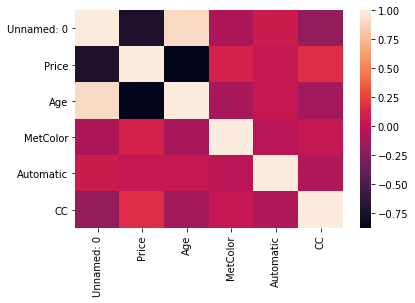

In [35]:
corr = datasets.corr()
corr.head()
print("\n==============================\n")
sns.heatmap(corr)

In [40]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
print("\nData : \n",columns)


Data : 
 [ True  True False  True  True  True]
